In [1]:
# !pip uninstall -y Pillow
# !pip install -Iv Pillow==5.3.0

In [2]:
# ВНИМАНИЕ; версия Pillow установвленна по умолчанию - '7.0.0'
# Эта версия ломает torchvision
import PIL
PIL.__version__

'5.3.0'

In [3]:
# https://www.kaggle.com/c/journey-springfield/data

---


**ВНИМАНИЕ: На этом этапе обязательно перезагрузить рантайм (Runtime -> Restart Runtime). Иначе версия 5.3.0 не будет загружена в рантайм.**

После перезапуска рантайма следует продолжить исполнять ячейки далее.

---



## **Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ**

# Путешествие по Спрингфилду.


Сегодня вам предстоить помочь телекомпании FOX  в обработке их контента. Как вы знаете сериал Симсоны идет на телеэкранах более 25 лет и за это время скопилось очень много видео материала. Персоонажи менялись вместе с изменяющимися графическими технологиями   и Гомер 2018 не очень похож на Гомера 1989. Нашей задачей будет научиться классифицировать персонажей проживающих в Спрингфилде. Думаю, что нет смысла представлять каждого из них в отдельности.



 ![alt text](https://vignette.wikia.nocookie.net/simpsons/images/5/5a/Spider_fat_piglet.png/revision/latest/scale-to-width-down/640?cb=20111118140828)



### Установка зависимостей

In [4]:
# !pip install -U torch torchvision

In [5]:
# ИСПРАВЛЕНИЕ: к сожалению этот код не работает у меня на коллабе
# плюс что-то намудрено с именами в репозитории pytorch
  
# установка подходящей версии torch

#from os.path import exists
#from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
#platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
#cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
#accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.5.0%2B{platform}-linux_x86_64.whl torchvision
#import torch

In [6]:
# ИСПРАВЛЕНИЕ:
# Вручную ищем и устанавливаем подходящуюю версию 
# https://download.pytorch.org/whl/torch_stable.html 
# !pip install -q 'https://download.pytorch.org/whl/cu101/torch-1.5.0%2Bcu101-cp36-cp36m-linux_x86_64.whl' torchvision
import torch

In [7]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()
print(train_on_gpu)
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')


torch.manual_seed(0)
np.random.seed(0)
#torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

True
CUDA is available!  Training on GPU ...


In [8]:
!nvidia-smi

Tue Jan  5 16:33:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    11W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
# ВНИМАНИЕ: мы это уже сделали вначале ноутбука

# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
#!pip uninstall -y Pillow
#!pip install Pillow==5.3.0
#import PIL
#print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime

In [10]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).




---

**ВНИМАНИЕ: скачайте датасет с каггла и положите его в корень своего гугл диска!**

---



In [11]:
# ИСПРАВЛЕНИЕ
#!unzip -q /content/gdrive/My\ Drive/simpsons/data/dataset.zip -d train
#!unzip -q /content/gdrive/My\ Drive/simpsons/data/testset.zip -d test

#!unzip -q /content/gdrive/My\ Drive/journey-springfield.zip

In [12]:
!ls train

simpsons_dataset


In [13]:
!nvidia-smi
import torch
torch.cuda.is_available()

Tue Jan  5 16:33:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [14]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms, models
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [15]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda:0")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} \\$,      константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [367]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        if self.mode == 'train':
          transform = transforms.Compose([
                                          transforms.ToTensor(),
                                           

                                          # transforms.RandomChoice(transforms = [
                                          #                                       transforms.RandomGrayscale(p=0.05),
                                          #                                       #transforms.ColorJitter(brightness=(0, 2)),
                                          #                                       #transforms.ColorJitter(contrast=(0, 2)),
                                          #                                       #transforms.ColorJitter(saturation=(0, 0.1)),
                                          #                                       #transforms.ColorJitter(hue=(-0.2, 0.2)),
                                          #                                       ]),
                                          

                                          #transforms.RandomGrayscale(p=0.005),
                                          transforms.RandomRotation(degrees = (-4, 4)),

                                          transforms.RandomChoice(transforms = [transforms.CenterCrop((220, 220)),
                                                                                 transforms.RandomGrayscale(p=0.005),                                                  
                                                                                 transforms.GaussianBlur(3, 1.5),
                                                                                 transforms.GaussianBlur(3, 2),
                                                                                 transforms.GaussianBlur(3, 3),
                                                                                 transforms.GaussianBlur(3, 5),
                                                                                 ]),

                                          transforms.CenterCrop((220, 220)),
                                         # transforms.Resize((224, 224)),
                                          transforms.RandomHorizontalFlip(p=0.5),
                                          transforms.RandomVerticalFlip(p=0.005),
                                          
                                           
                                          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
                                          ])
          
        else:
          transform = transforms.Compose([
                                          




                                          transforms.ToTensor(),



                                          transforms.Resize((220, 300)),
                                          #transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=None, resample=False, fillcolor=(255, 255, 255)),
                                          #transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0),
                                          transforms.CenterCrop((220, 220)),
                                          # transforms.RandomChoice(transforms = [
                                          #                                       #transforms.Resize((220, 140)),
                                          #                                       transforms.Resize((220, 160)),
                                          #                                       transforms.Resize((220, 230)),                                                                               
                                          #                                       transforms.Resize((220, 250)),
                                          #                                        ]),         

                                           
                                          #transforms.Resize((1524, 1540)),
                                          #transforms.CenterCrop((220, 220)),
                                          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                          ])
        
        
        
        
        
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        
        x = transform(x)
      
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [359]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [360]:
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [361]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.10, \
                                          stratify=train_val_labels, random_state=42)

In [362]:
val_dataset = SimpsonsDataset(val_files, mode='val')    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [363]:
#uncomment if you have problem with pillow
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
    for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [364]:
len(train_files), len(val_files)

(18839, 2094)

Давайте посмотрим на наших героев внутри датасета.

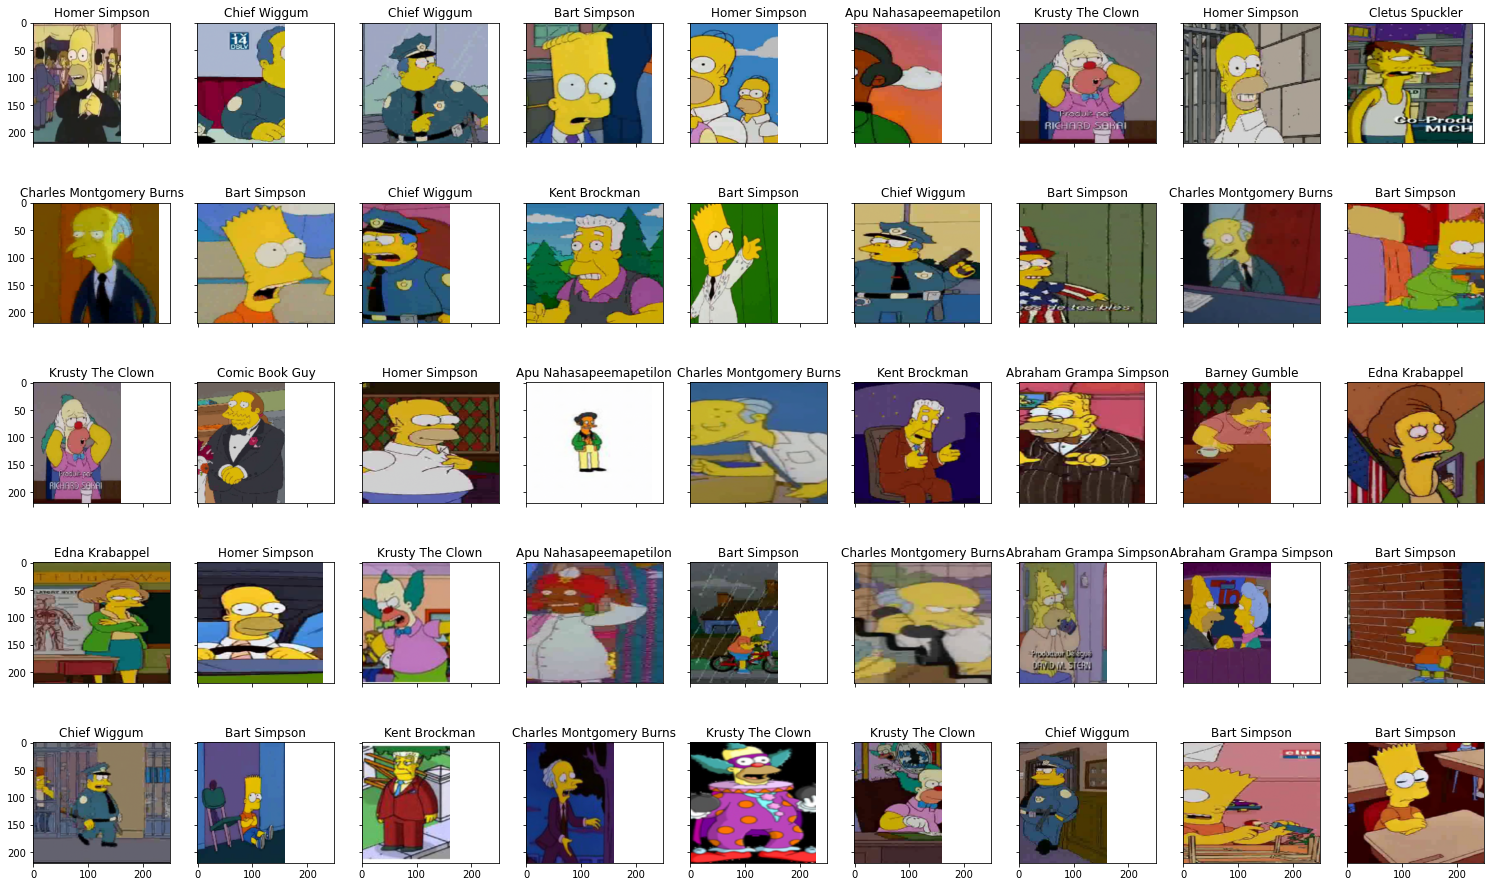

In [365]:
fig, ax = plt.subplots(nrows=5, ncols=9 ,figsize=(26, 16), sharey=True, sharex=True)
for fig_x in ax.flatten():
  random_characters = int(np.random.uniform(0, 1000))
  im_val, label = val_dataset[random_characters]
  img_label = " ".join(map(lambda x: x.capitalize(), val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
  imshow(im_val.data.cpu(), title=img_label,plt_ax=fig_x)

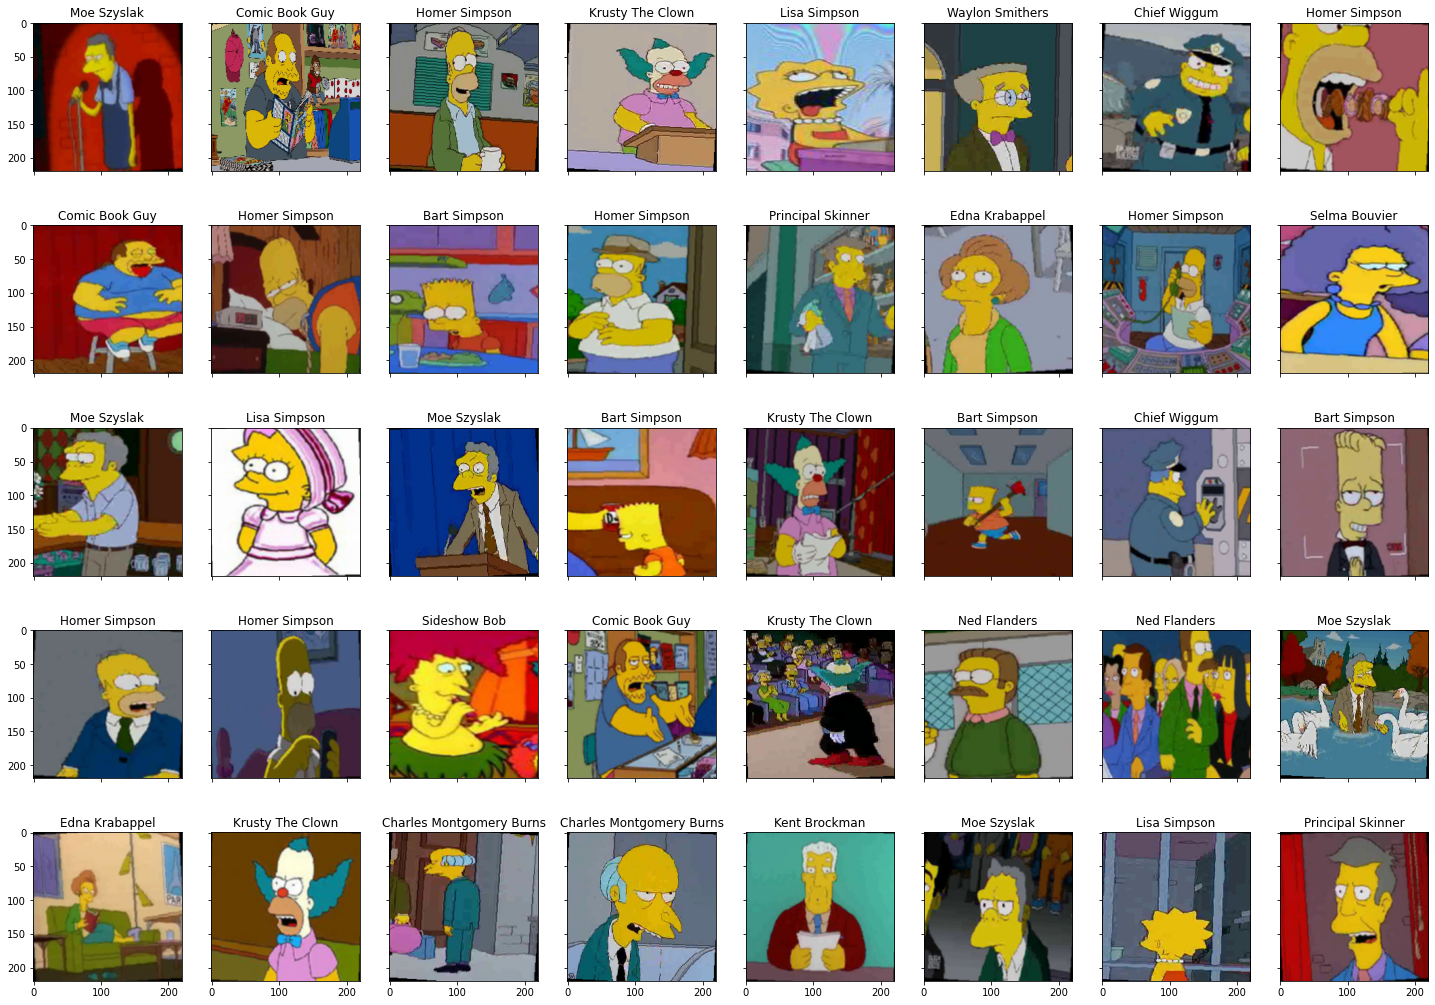

In [366]:
fig, ax = plt.subplots(nrows=5, ncols=8 ,figsize=(25, 18), sharey=True, sharex=True)
for fig_x in ax.flatten():
  random_characters = int(np.random.uniform(0, len(train_files)))
  im_val, label = train_dataset[random_characters]
  img_label = " ".join(map(lambda x: x.capitalize(), train_dataset.label_encoder.inverse_transform([label])[0].split('_')))
  imshow(im_val.data.cpu(), title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

# **Построение нейросети**

Запустить данную сеть будет вашим мини-заданием на первую неделю, чтобы было проще участвовать в соревновании.

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


In [ ]:
# resnet18 = models.resnet18(pretrained=True)
# resnet18

# wide_resnet50_2 = models.wide_resnet50_2()
# wide_resnet50_2


In [180]:
# Очень простая сеть

# SimpleCnn = models.vgg16(pretrained=True) ## we train the weights only of the last layers
# for param in SimpleCnn.features.parameters():
#   param.requires_grad = False

# SimpleCnn.classifier[6] = torch.nn.Linear(SimpleCnn.classifier[6].in_features, n_classes)

class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        #model = models.wide_resnet50_2(pretrained=True) 
        model = models.resnet18(pretrained=True) #models.vgg16(pretrained=True)

        # we train the weights only of the last layers
        for param in model.parameters():
          param.requires_grad = False

        model.fc = torch.nn.Linear(model.fc.in_features, n_classes)
        self.model = model
        

  
  
    def forward(self, x):
        out = self.model(x)


        return out

In [27]:
def fit_epoch(model, train_loader, criterion, optimizer):

    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
    model.train()
   
    for inputs, labels in train_loader:
        
        optimizer.zero_grad()

        
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
         
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [28]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [29]:
# # посчитаем веса
# def create_dct_path_labels(train_files, train_labels):
#     dct_simpsons = {}
#     for label_i in np.unique(train_labels).tolist():
#         dct_simpsons[label_i] = []

#     for path_i, label_i in zip(train_files, train_labels):
#         dct_simpsons[label_i].append(path_i)

#     return dct_simpsons

# def print_dct(dct_simpsons):
#     for key in dct_simpsons:
#         print(f"{key}\t{dct_simpsons[key]}")

In [30]:
# samples_train_weight = count_weights_from_labels(train_labels, dct_simpsons_wht)
# sampler_train_wht = torch.utils.data.WeightedRandomSampler(samples_train_weight, len(samples_train_weight))

# samples_val_weight = count_weights_from_labels(val_labels, dct_simpsons_wht)
# sampler_val_wht = torch.utils.data.WeightedRandomSampler(samples_val_weight, len(samples_val_weight))

# # определим загрузщики данных с взвешиванием классов для их балансировки WeightedRandomSampler
# BATCH_SIZE = 128
# # DataLoader достаёт данные из dataset батчами
# dataloaders_wht = {'train': DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler_train_wht),
#                'val': DataLoader(val_dataset, batch_size=BATCH_SIZE, sampler=sampler_val_wht)}
# dataset_sizes = {'train': len(train_dataset), 'val':len(val_dataset) }


#train_dataset  

In [31]:
def get_sampler(train_dataset, val_dataset):
  train_targets = train_dataset.labels
  val_targets = val_dataset.labels
  train_class_to_weight = dict(zip(np.unique(train_targets, return_counts=True)[0], 1/np.unique(train_targets, return_counts=True)[1]))

  train_samples_weight = torch.from_numpy(np.array(list(map(lambda x: train_class_to_weight[x], train_targets))))
  train_sampler = torch.utils.data.WeightedRandomSampler(train_samples_weight, len(train_samples_weight))

  val_samples_weight = torch.from_numpy(np.array(list(map(lambda x: train_class_to_weight[x], val_targets))))
  val_sampler = torch.utils.data.WeightedRandomSampler(val_samples_weight, len(val_samples_weight))

  return train_sampler, val_sampler 
 

In [32]:
# train_dataset.labels

In [33]:
def train(train_files, val_files, model, epochs, batch_size):



 

    train_sampler, val_sampler = get_sampler(train_dataset, val_dataset)



    train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler = train_sampler)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, sampler = val_sampler)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.AdamW(model.parameters())
         
        criterion = nn.CrossEntropyLoss()
       
        for epoch in range(epochs):
             
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
             
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [34]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [35]:
DEVICE

device(type='cuda', index=0)

In [36]:
n_classes = len(np.unique(train_val_labels))

simple_cnn = SimpleCnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(simple_cnn)

we will classify :42
SimpleCnn(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, a

Запустим обучение сети.

In [37]:
torch.cuda.empty_cache()

In [38]:
history = train(train_dataset, val_dataset, 
                model=simple_cnn, 
                epochs=4, 
                batch_size = 128)

epoch:  25%|██▌       | 1/4 [03:53<11:41, 233.79s/it]


Epoch 001 train_loss: 2.5991     val_loss 3.4817 train_acc 0.4295 val_acc 0.2975


epoch:  50%|█████     | 2/4 [07:51<07:50, 235.04s/it]


Epoch 002 train_loss: 1.5393     val_loss 3.5779 train_acc 0.6881 val_acc 0.3410


epoch:  75%|███████▌  | 3/4 [11:48<03:55, 235.46s/it]


Epoch 003 train_loss: 1.1449     val_loss 3.7051 train_acc 0.7684 val_acc 0.3615


epoch: 100%|██████████| 4/4 [15:37<00:00, 234.40s/it]


Epoch 004 train_loss: 0.9938     val_loss 3.9722 train_acc 0.7797 val_acc 0.3720


Построим кривые обучения

In [39]:
loss, acc, val_loss, val_acc = zip(*history)

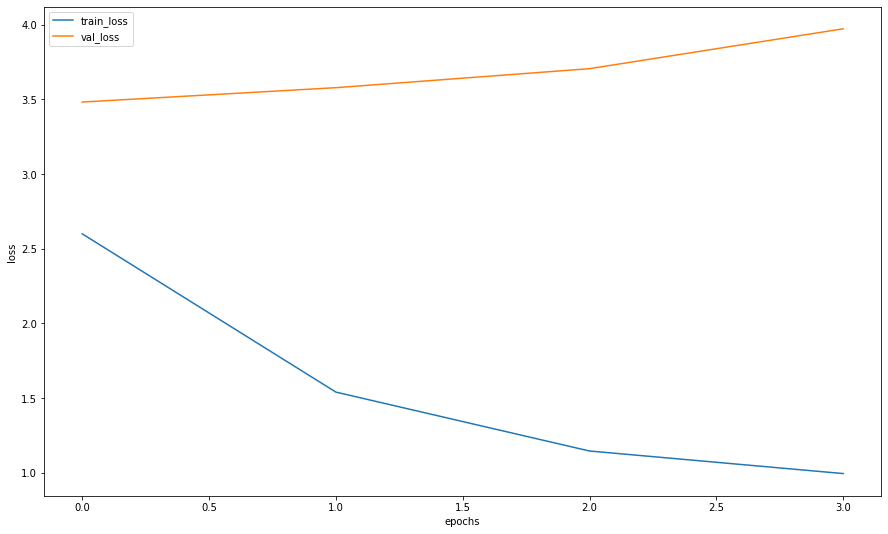

In [40]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

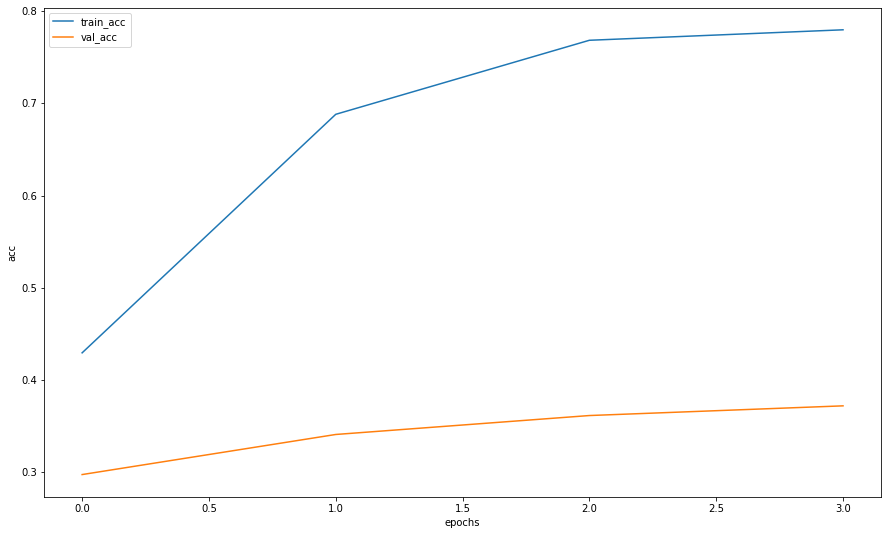

In [41]:
plt.figure(figsize=(15, 9))
plt.plot(acc, label="train_acc")
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

### Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [42]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [43]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(simple_cnn, ex_img.unsqueeze(0))

In [44]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(simple_cnn, imgs)

In [45]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [46]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [47]:
y_pred

array([ 7, 17,  2,  4, 24, 17, 36,  7,  4, 23,  2, 15,  2,  4,  6,  7,  2,
       15,  2, 17])

In [48]:
from sklearn.metrics import f1_score
f1_score(actual_labels, y_pred, average='micro')

0.75

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

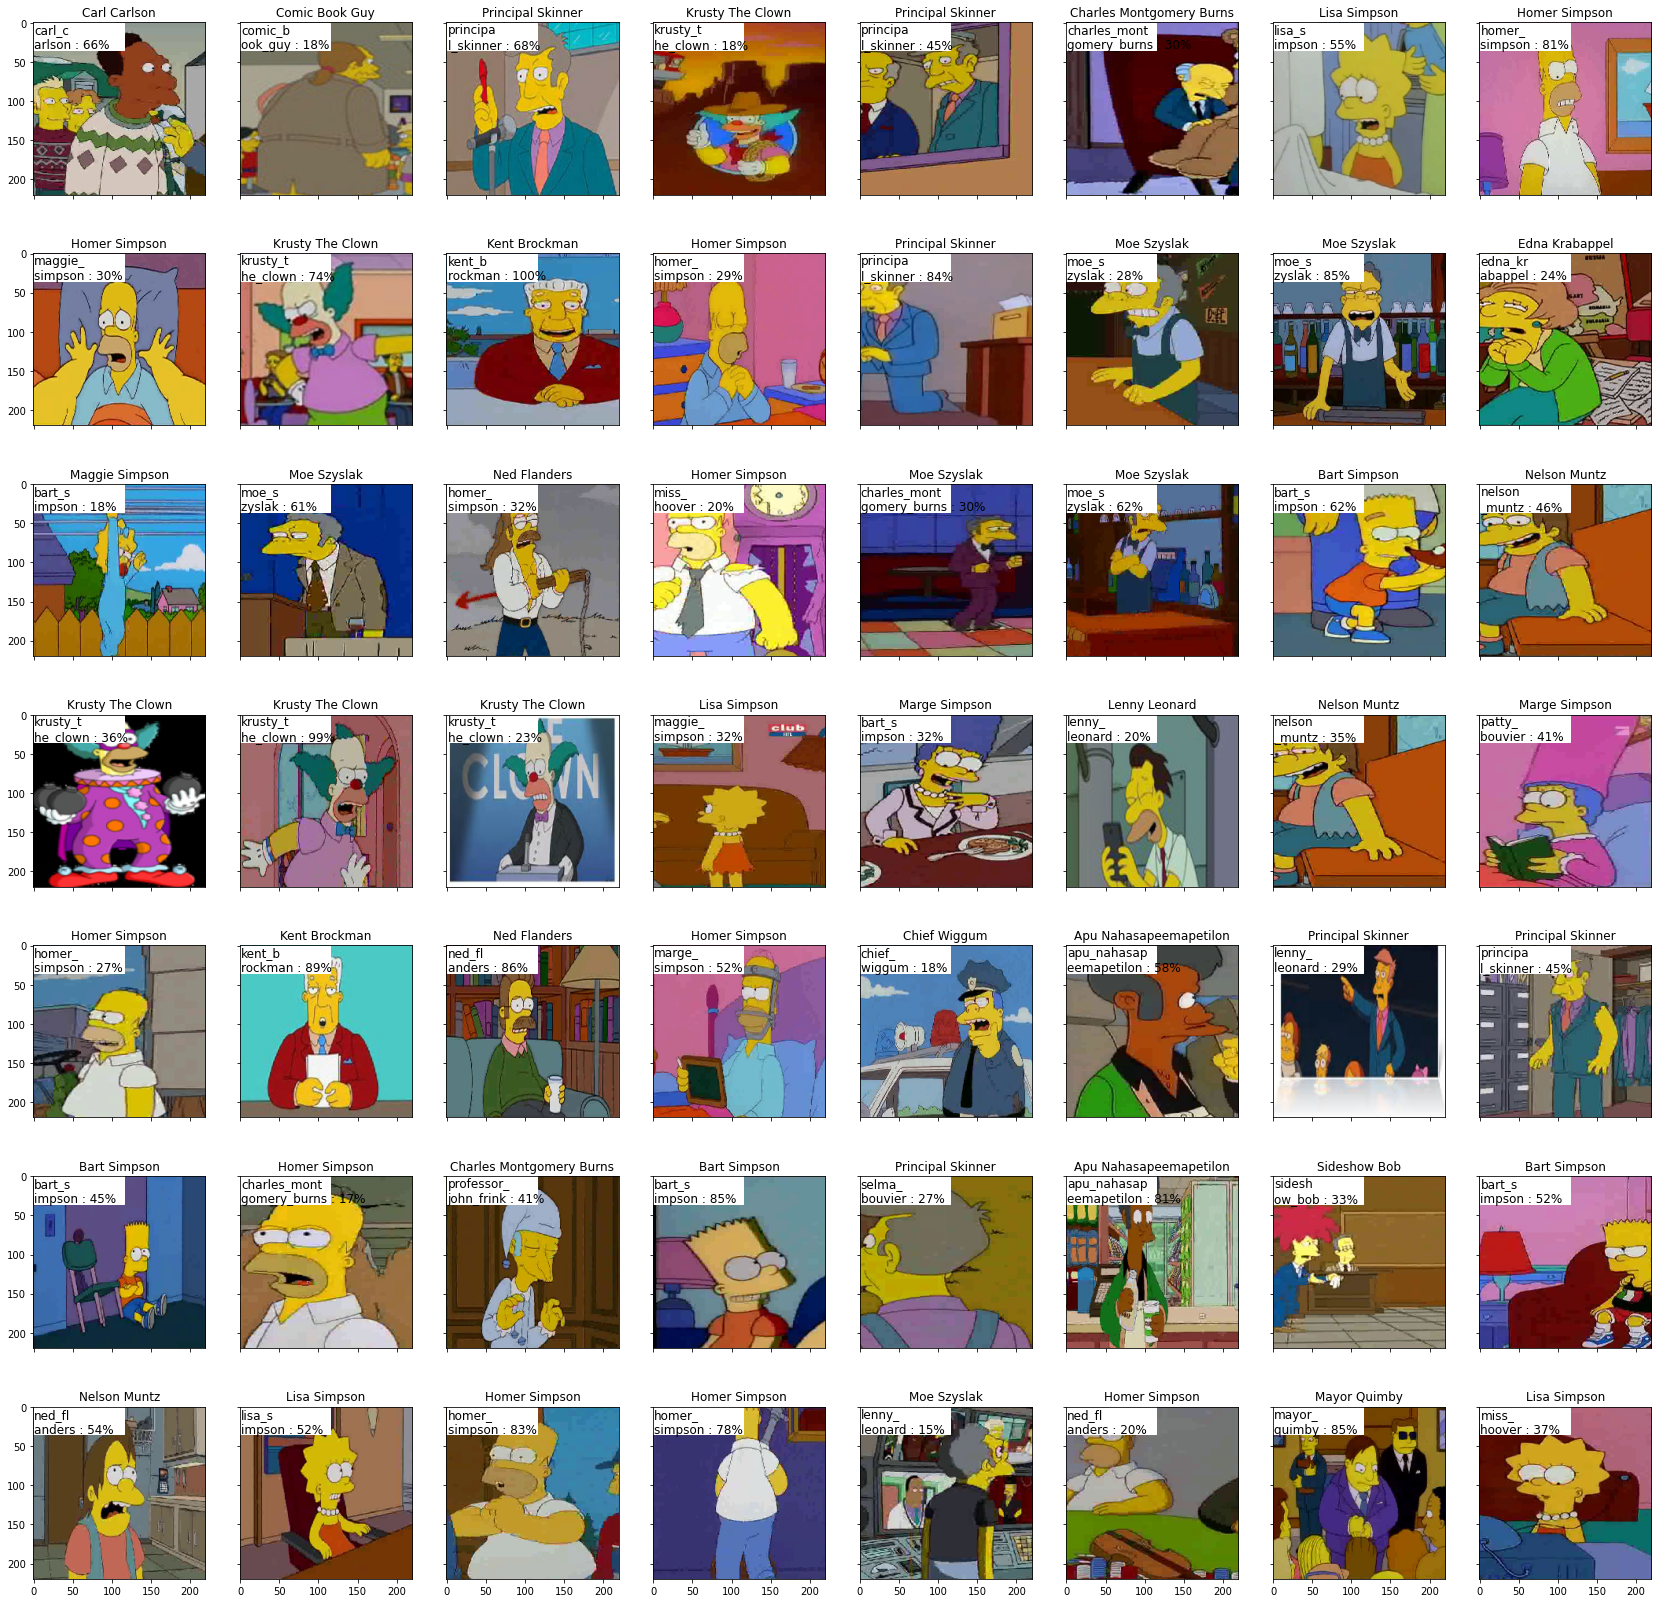

In [194]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=7, ncols=8, figsize=(29, 29), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0, len(val_dataset)))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label, plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 0), 115, 35, color='white'))
    font0 = FontProperties()
    font = font0.copy()
    #font.set_family("fantasy")
    prob_pred = predict_one_sample(simple_cnn, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label, predicted_proba)
            
    fig_x.text(1, 1, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top', fontsize=12, color='black')  #fontweight='bold'

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

### Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [50]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(simple_cnn, test_loader)

preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [51]:
test_filenames

['img0.jpg',
 'img1.jpg',
 'img10.jpg',
 'img100.jpg',
 'img101.jpg',
 'img102.jpg',
 'img103.jpg',
 'img104.jpg',
 'img105.jpg',
 'img106.jpg',
 'img107.jpg',
 'img108.jpg',
 'img109.jpg',
 'img11.jpg',
 'img110.jpg',
 'img111.jpg',
 'img112.jpg',
 'img113.jpg',
 'img114.jpg',
 'img115.jpg',
 'img116.jpg',
 'img117.jpg',
 'img118.jpg',
 'img119.jpg',
 'img12.jpg',
 'img120.jpg',
 'img121.jpg',
 'img122.jpg',
 'img123.jpg',
 'img124.jpg',
 'img125.jpg',
 'img126.jpg',
 'img127.jpg',
 'img128.jpg',
 'img129.jpg',
 'img13.jpg',
 'img130.jpg',
 'img131.jpg',
 'img132.jpg',
 'img133.jpg',
 'img134.jpg',
 'img135.jpg',
 'img136.jpg',
 'img137.jpg',
 'img138.jpg',
 'img139.jpg',
 'img14.jpg',
 'img140.jpg',
 'img141.jpg',
 'img142.jpg',
 'img143.jpg',
 'img144.jpg',
 'img145.jpg',
 'img146.jpg',
 'img147.jpg',
 'img148.jpg',
 'img149.jpg',
 'img15.jpg',
 'img150.jpg',
 'img151.jpg',
 'img152.jpg',
 'img153.jpg',
 'img154.jpg',
 'img155.jpg',
 'img156.jpg',
 'img157.jpg',
 'img158.jpg',
 'img

ValueError: ignored

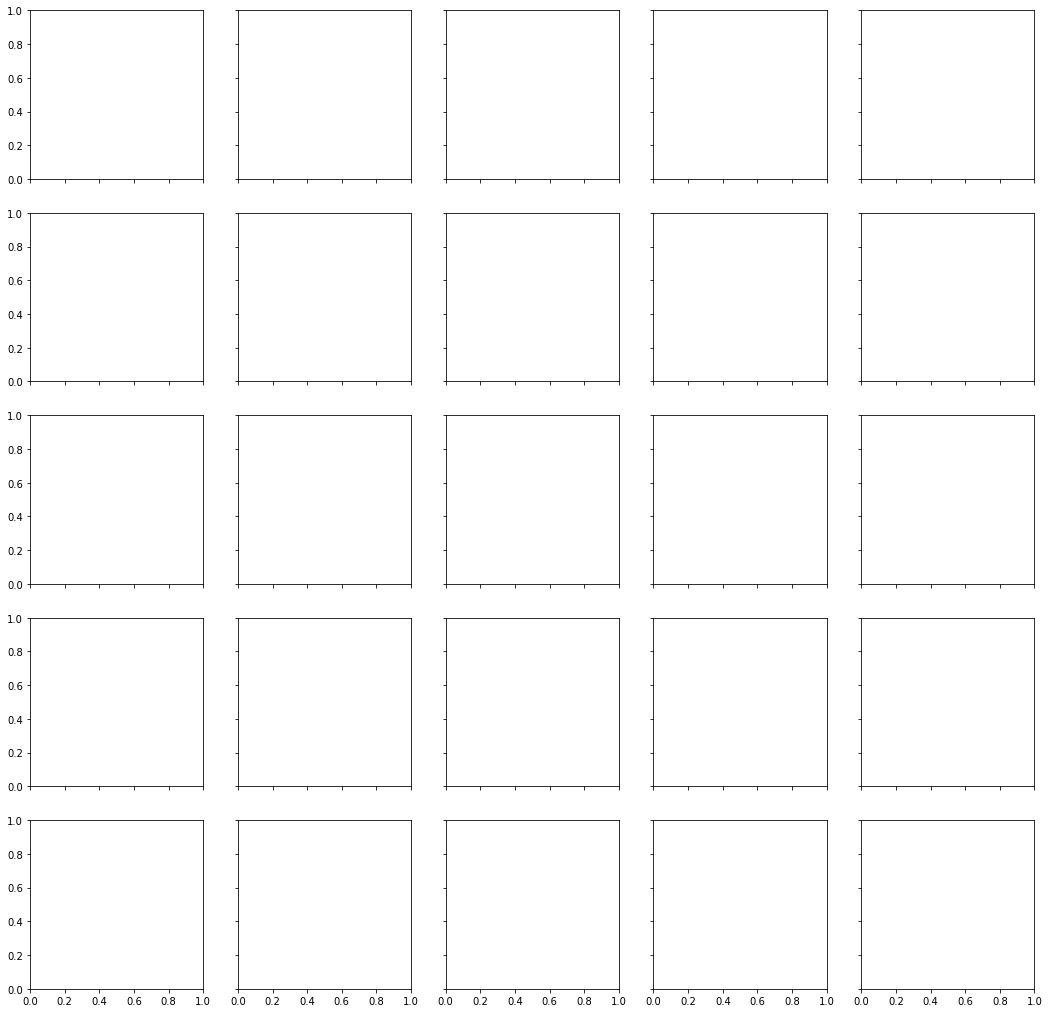

In [52]:
fig, ax = plt.subplots(nrows=5, ncols=5 ,figsize=(18, 18), sharey=True, sharex=True)
for fig_x in ax.flatten():
  random_characters = int(np.random.uniform(0, 1000))
  im_val, label = test_dataset[random_characters]
  img_label = " ".join(map(lambda x: x.capitalize(), val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
  imshow(im_val.data.cpu(), title=img_label,plt_ax=fig_x)

# **Создание сабмита**

In [ ]:
# ДОБАВЛЕНО: создание сабмита
import pandas as pd
df = pd.DataFrame()
df['Id'] = test_filenames
df['Expected'] = preds
df.to_csv('gdrive/My Drive/simpsons_simple_cnn_baseline.csv', index=False)
# файл появится у вас на гугл диске

In [ ]:
! ls gdrive/My\ Drive/

In [ ]:
# ЗДЕСЬ что-то не работает. Не понятно зачем читайют лейблы 
#import pandas as pd
#my_submit = pd.read_csv("gdrive/My Drive/simpsons/data/labels.csv")
#my_submit = pd.DataFrame({'Image_id': test_filenames, 'Expected': preds})
#my_submit.head()

In [ ]:
# TODO : сделайте сабмит (это важно, если Вы не справляетесь, но дошли до этой ячейки, то сообщите в чат и Вам помогут)

## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеюсь, что у Вас получится!

![alt text](https://pbs.twimg.com/profile_images/798904974986113024/adcQiVdV.jpg)
